<a href="https://colab.research.google.com/github/SSrishti-14/AI_Lab/blob/main/AIlabsessional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Path: [(0, 0), (1, 1), (1, 1), (0, 3), (1, 5), (1, 1)]
Fuel Cost: 9


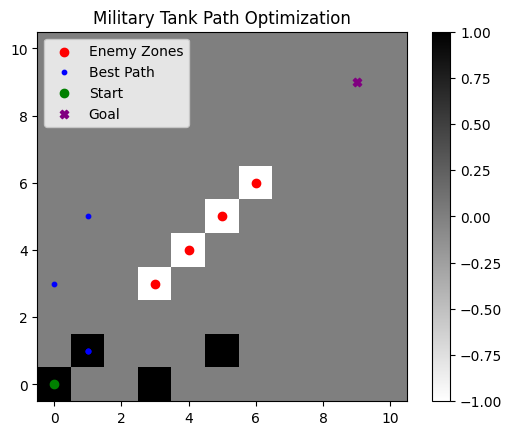

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

Xmax, Ymax = 10, 10
start = (0, 0)
goal = (9, 9)
Lmax = 20

terrain_costs = np.random.randint(1, 5, (Xmax + 1, Ymax + 1))

enemy_zones = {(3, 3), (4, 4), (5, 5), (6, 6)}

POP_SIZE = 50
GENERATIONS = 100
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.05
TOURNAMENT_SIZE = 3
ELITISM_PERCENTAGE = 0.1

def generate_random_path():
    path = [start]
    while len(path) < Lmax and path[-1] != goal:
        x, y = path[-1]
        moves = [(x + dx, y + dy) for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]]
        moves = [(nx, ny) for nx, ny in moves if 0 <= nx <= Xmax and 0 <= ny <= Ymax and (nx, ny) not in path]
        if moves:
            path.append(random.choice(moves))
        else:
            break
    return path

def fitness(path):
    #this function evaluates the path based on fuel consumption and penalties.
    cost = sum(terrain_costs[x, y] for x, y in path)
    penalty = sum(10 for x, y in path if (x, y) in enemy_zones)
    return cost + penalty

def selection(population):
    selected = random.sample(population, TOURNAMENT_SIZE)
    return min(selected, key=lambda p: p[1])

def crossover(parent1, parent2):
    if random.random() > CROSSOVER_RATE:
        return parent1[0], parent2[0]  # No crossover

    split = random.randint(1, min(len(parent1[0]), len(parent2[0])) - 1)
    child1 = parent1[0][:split] + parent2[0][split:]
    child2 = parent2[0][:split] + parent1[0][split:]
    return child1, child2

def mutate(path):
    if random.random() < MUTATION_RATE:
        index = random.randint(1, len(path) - 1)
        x, y = path[index]
        moves = [(x + dx, y + dy) for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]]
        moves = [(nx, ny) for nx, ny in moves if 0 <= nx <= Xmax and 0 <= ny <= Ymax]
        if moves:
            path[index] = random.choice(moves)
    return path

population = [(generate_random_path(), None) for _ in range(POP_SIZE)]
population = [(path, fitness(path)) for path, _ in population]


for gen in range(GENERATIONS):
    population.sort(key=lambda p: p[1])
    new_population = population[:int(ELITISM_PERCENTAGE * POP_SIZE)]  # Elitism

    while len(new_population) < POP_SIZE:
        p1, p2 = selection(population), selection(population)
        child1, child2 = crossover(p1, p2)
        child1, child2 = mutate(child1), mutate(child2)
        new_population.append((child1, fitness(child1)))
        if len(new_population) < POP_SIZE:
            new_population.append((child2, fitness(child2)))

    population = new_population

best_path, best_fitness = min(population, key=lambda p: p[1])
print("Best Path:", best_path)
print("Fuel Cost:", best_fitness)

def visualize_path(best_path):
    grid = np.zeros((Xmax + 1, Ymax + 1))
    for x, y in enemy_zones:
        grid[x, y] = -1  # Mark enemy zones

    for x, y in best_path:
        grid[x, y] = 1  # Mark path

    plt.imshow(grid, cmap='gray_r', origin='lower')
    plt.colorbar()
    plt.scatter(*zip(*enemy_zones), c='red', label='Enemy Zones')
    plt.scatter(*zip(*best_path), c='blue', label='Best Path', s=10)
    plt.scatter(*start, c='green', label='Start', marker='o')
    plt.scatter(*goal, c='purple', label='Goal', marker='X')
    plt.legend()
    plt.title("Military Tank Path Optimization")
    plt.show()

visualize_path(best_path)